In [1]:
#importing essential libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle as pk
import numba as nb
import keras


Using TensorFlow backend.


In [2]:
#Random lattice creation function
def latticecreate(n):
    lattice = np.random.choice(a=[-1,1],size=(n,n))
    return lattice

In [310]:
#metropolis algorithm with 5x 10e5
@nb.jit(nopython=True)
def metropolis(lattice,n,j,T):
    mag=[]
    steps=[]
    for k in range (0,1000):
        for l in range (0,500):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            
            nb = lattice[(x+1)%n,y] + lattice[x,(y+1)%n] + lattice[(x-1)%n,y] + lattice[x,(y-1)%n]
            
            deltaE=lattice[x,y]*2*nb*j
            p=random.uniform(0,1)
            if deltaE<0:
                lattice[x,y]=lattice[x,y]*(-1)
        
            else:
                r=math.exp((-deltaE)/(T))
                if p<r:
                    lattice[x,y]=lattice[x,y]*(-1)
                else:
                    lattice[x,y]=lattice[x,y]
        mag.append(abs(magnetisation(lattice,n)))
        steps.append(k*300)
 
    return mag,steps,lattice

In [289]:
#metropolis algorithm with 1x10e8 steps
@nb.jit(nopython=True)
def metropolis1(lattice,n,j,T):
    mag=[]
    steps=[]
    for k in range (0,100000):
        for l in range (0,1000):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            
            nb = lattice[(x+1)%n,y] + lattice[x,(y+1)%n] + lattice[(x-1)%n,y] + lattice[x,(y-1)%n]
            
            deltaE=lattice[x,y]*2*nb*j
            p=random.uniform(0,1)
            if deltaE<0:
                lattice[x,y]=lattice[x,y]*(-1)
        
            else:
                r=math.exp((-deltaE)/(T))
                if p<r:
                    lattice[x,y]=lattice[x,y]*(-1)
                else:
                    lattice[x,y]=lattice[x,y]
        mag.append(abs(magnetisation(lattice,n)))
        steps.append(k*300)
 
    return mag,steps,lattice

In [290]:
#magnetisation calculator
@nb.jit(nopython=True)
def magnetisation(lattice,n):
    mag1=0
    for i in range(0,n):
        for j in range(0,n):
            mag1=mag1+lattice[i,j]
    return mag1/(n**2)

In [360]:
#loading the model available models are -modellstm(0.1,2,3).h5
model = keras.models.load_model('modellstm_T(0.1).h5')

In [361]:
#creation of 
lattice=latticecreate(50)

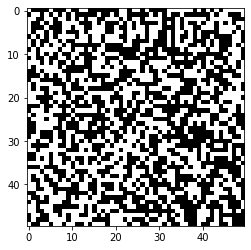

In [362]:
plt.imshow(lattice,cmap='Greys')

In [363]:
%%time
#the conventional metropolis algorithm with 10e8 steps
mag,steps,nlattice=metropolis1(lattice.copy(),50,1,0.1)

Wall time: 6.01 s


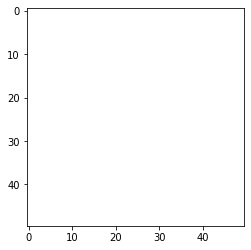

In [364]:
plt.imshow(nlattice,cmap='Greys')

In [365]:
%%time
#metropolis algorithm combined with machine learning model
for i in range(0,3):
    lattice=model.predict(lattice.reshape(1,1,(50*50)))
    lattice=lattice.reshape(50,50)
    f=((lattice.max()+lattice.min())/2)
    for k in range (0,50):
        for m in range (0,(50)):
            if lattice[k,m]<f:
                lattice[k,m]=-1
            else:
                lattice[k,m]=1
mag,steps,lattice=metropolis(lattice,50,1,0.1)

Wall time: 1.37 s


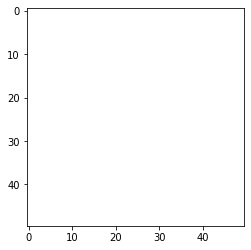

In [366]:
plt.imshow(lattice,cmap='Greys')